In [7]:
import pandas as pd
import numpy as np
import os
from os import path
from tqdm import tqdm
from scipy import stats
#RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from mordred import Calculator, descriptors

## Generating 3D Structures for MetaD in Explicit Solvent

### Check SMILES by use of RDKit

,Complex,Source_doi,Shift,Brutto,Geometry,Ligand,SMILES,Structure
0,10,https://doi.org/10.1002/ejic.201600573,-2690,[PtBr4]2-,sq-pl,hal,Br[Pt@SP1](Br)(Br)Br,
1,11,https://doi.org/10.1002/ejic.201600573,-3103,cis-[PtCl2I2]2-,sq-pl,hal,Cl[Pt@SP1](Cl)(I)I,
2,12,https://doi.org/10.1002/ejic.201600573,-3260,[PtBr3I]2-,sq-pl,hal,Br[Pt@SP1](Br)(Br)I,
3,13,https://doi.org/10.1002/ejic.201600573,-3977,trans-[PtBr2I2]2-,sq-pl,hal,I[Pt@SP1](Br)(I)Br,
4,14,https://doi.org/10.1002/ejic.201600573,-3985,cis-[PtBr2I2]2-,sq-pl,hal,Br[Pt@SP1](Br)(I)I,
5,15,https://doi.org/10.1002/ejic.201600573,-4213,[PtClI3]2-,sq-pl,hal,Cl[Pt@SP1](I)(I)I,
6,16,https://doi.org/10.1002/ejic.201600573,-4667,[PtBrI3]2-,sq-pl,hal,Br[Pt@SP1](I)(I)I,
7,34,https://doi.org/10.1002/ejic.201600573,2534,trans-[PtCl4F2] 2-,oct,hal,[Pt@OH1]([F])([Cl])([Cl])([Cl])([Cl])[F],
8,35,https://doi.org/10.1002/ejic.201600573,2487,fac-[PtBr3F3] 2-,oct,hal,[Pt@OH1]([F])([F])([F])([Br])([Br])[Br],
9,36,https://doi.org/10.1002/ejic.201600573,2171,cis-[PtCl4F2] 2-,oct,hal,[Pt@OH1]([Cl])([Cl])([Cl])([Cl])([F])[F],

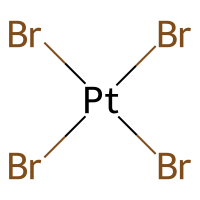
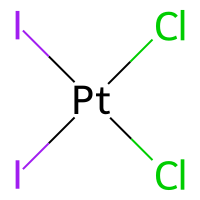
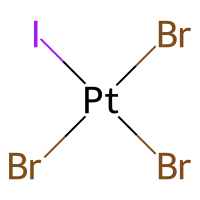
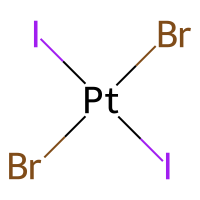
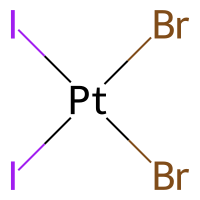
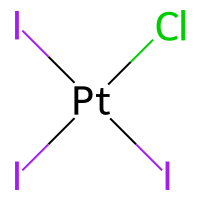
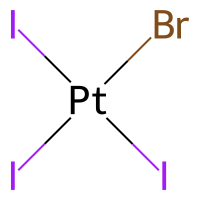
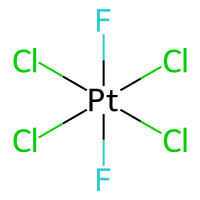
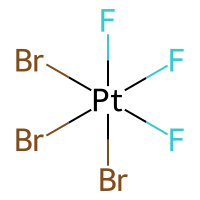
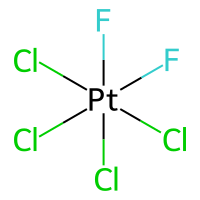
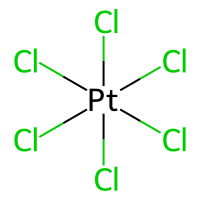
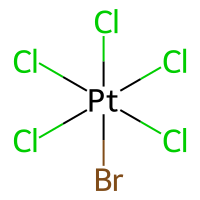
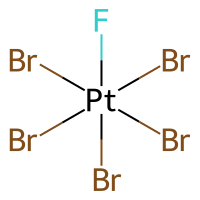
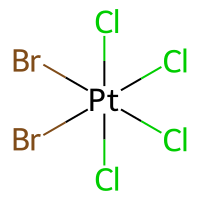
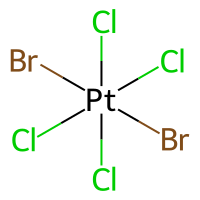
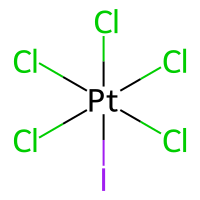
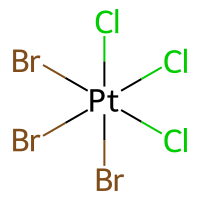
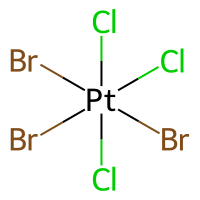
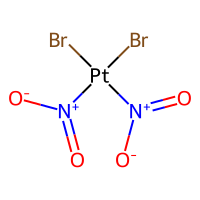
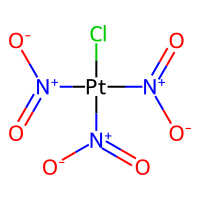
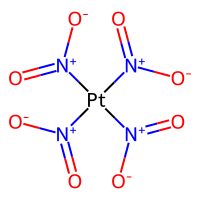

,Complex,Brutto,SMILES,Structure
0,10,[PtBr4]2-,Br[Pt@SP1](Br)(Br)Br,<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
1,11,cis-[PtCl2I2]2-,Cl[Pt@SP1](Cl)(I)I,<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
2,12,[PtBr3I]2-,Br[Pt@SP1](Br)(Br)I,<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
3,13,trans-[PtBr2I2]2-,I[Pt@SP1](Br)(I)Br,<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
4,14,cis-[PtBr2I2]2-,Br[Pt@SP1](Br)(I)I,<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
5,15,[PtClI3]2-,Cl[Pt@SP1](I)(I)I,<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
6,16,[PtBrI3]2-,Br[Pt@SP1](I)(I)I,<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
7,34,trans-[PtCl4F2] 2-,[Pt@OH1]([F])([Cl])([Cl])([Cl])([Cl])[F],<rdkit.Chem.rdchem.Mol object at 0x0000014CA14...
8,35,fac-[PtBr3F3] 2-,[Pt@OH1]([F])([F])([F])([Br])([Br])[Br],<rdkit.Chem.rdchem.Mol object at 0x0000014CA17...
9,36,cis-[PtCl4F2] 2-,[Pt@OH1]([Cl])([Cl])([Cl])([Cl])([F])[F],<rdkit.Chem.rdchem.Mol object at 0x0000014CA17...


In [13]:
dataset_initial = pd.read_csv(r'dataset_test.csv')
PandasTools.AddMoleculeColumnToFrame(dataset_initial, smilesCol='SMILES', molCol='Structure')
dataset_initial.columns = ['Complex', 'Source_doi', 'Shift', 'Brutto', 'Geometry',\
                            'Ligand', 'SMILES', 'Structure']

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       ):
    display(dataset_initial)
    display(dataset_initial[['Complex', 'Brutto', 'SMILES', 'Structure']])

### Generate 3D structures. Note: xtb and openbabel must be pre-installed on your device

In [4]:
dataset_path = r'../dataset'
#paste your path to pre-installed xtb https://github.com/grimme-lab/xtb/releases/tag/v6.6.0
path_to_xtb = '/Users/username/.../xtb '
babel_convert = 'obabel init.mol -O init.xyz; '

molecule_charge = '-2'
solvent = 'H2O' 

# Note that molecule_charge is included in this string
xtb_opt = 'init.xyz --gfn 2 --chrg ' + molecule_charge + ' --opt --alpb ' \
+ solvent + ' > opt.out & wait;'

for index, row in dataset_initial[['Complex', 'SMILES']].iterrows():
    
    try:
        os.mkdir(os.path.join(dataset_path, str(row['Complex'])))
        os.mkdir(os.path.join(dataset_path, str(row['Complex']), 'Solute'))
        os.mkdir(os.path.join(dataset_path, str(row['Complex']), 'Solvation'))
    except:
        print('Required directory already exists!')
    
    
    molecule = Chem.MolFromSmiles(row['SMILES'])

    molecule_3d = Chem.AddHs(molecule)
    AllChem.EmbedMolecule(molecule_3d)

    print(Chem.MolToMolBlock(molecule_3d),file=open(os.path.join(dataset_path,
                                                                 str(row['Complex']), 'Solute', 'init.mol'),'w'))

    os.system('cd ' + os.path.join(dataset_path, str(row['Complex']), 'Solute') + ';' +
              babel_convert + path_to_xtb + xtb_opt)
    
    os.system('cp ' + os.path.join(dataset_path, 'Solvent', 'xtbopt.xyz') + ' ' +
              os.path.join(dataset_path, str(row['Complex']), 'Solvation', 'solvent.xyz'))
    
    os.system('cp ' + os.path.join(dataset_path, str(row['Complex']), 'Solute', 'xtbopt.xyz') +
              ' ' + os.path.join(dataset_path, str(row['Complex']), 'Solvation', 'solute.xyz'))
    
    
    

1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
1 molecule converted
normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
[17:28:31] UFFTYPER: Unrecognized atom type: Pt6+2 (0)
1 molecule converted
normal termination of x